<a href="https://colab.research.google.com/github/IT-HONGREAT/colab_study/blob/main/Dacon_%EC%99%80%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#데이터를 불러온다

red = pd.read_csv('/content/winequality-red.csv',sep = ';')
white = pd.read_csv('/content/winequality-white.csv',sep = ';')


In [3]:
display(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
display(white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
#red와 white의 변수가 같으니 하나로 합치는 것이 좋을 것 같다.
#하지만 하나로 합치려면 red와 white의 구분이 어려울수도 있기 때문에
#뒤에 type을 추가해 주자

In [6]:
red['type']   = 0
white['type'] = 1

In [7]:
print(red.head(2))

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]


In [8]:
print(white.head(2))

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]


In [9]:
#하나로 합치기
wine = pd.concat([red, white])
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


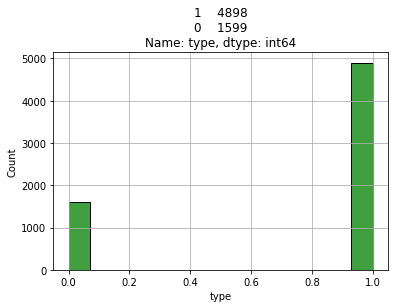

In [10]:
#평균값을 보니 0.5가 아니라 0.75이다.
# 한쪽으로 쏠려있는지 확인해본다.

sns.histplot(wine['type'], color = 'green')
plt.title('{}'.format(wine['type'].value_counts()))

plt.grid()
plt.show()
#type, 즉 red와 white의 비율을 볼 수 있다.

In [11]:
#데이터를 섞어준다. 마지막 종속변수가 한쪽으로 쏠릴수도있기 때문, 기타 등등
wine[:30]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [12]:
#섞어준다.
wine_shuffle = wine.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
1592            6.8             0.210         0.74  ...     10.7        6     1
1564            9.1             0.280         0.49  ...     10.1        5     1
4511            6.1             0.270         0.32  ...     12.5        6     1
1353            7.6             0.645         0.03  ...     10.3        5     0
222             6.2             0.250         0.25  ...     11.1        7     1

[5 rows x 13 columns]


In [13]:
#넘파이화
wine_np = wine_shuffle.to_numpy()
print(type(wine_np))

<class 'numpy.ndarray'>


In [14]:
print("Total dataset index : " , len(wine_np))
train_idx = int(len(wine_np) * 0.8)
print("Train dataset index : ", train_idx)

Total dataset index :  6497
Train dataset index :  5197


In [15]:
train_X, train_Y =  wine_np[ : train_idx,  : -1], wine_np[ : train_idx,  -1]
test_X, test_Y   =  wine_np[ train_idx : , : -1], wine_np[ train_idx : , -1]

In [16]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
#학습과 테스트가 잘 쪼개진 것을 볼 수 있다.

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [17]:
train_X[0]

array([6.800e+00, 2.100e-01, 7.400e-01, 1.200e+00, 4.700e-02, 2.500e+01,
       1.110e+02, 9.916e-01, 3.130e+00, 4.100e-01, 1.070e+01, 6.000e+00])

In [18]:
print("\nBefore - to_categorical : \n")

print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

#red와 white를 카테고리로 구분하자.

train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y_to_categorical  = tf.keras.utils.to_categorical(test_Y, num_classes=2)


test_Y_to_categorical_5  = tf.keras.utils.to_categorical(test_Y, num_classes = 5)

print("\nAfter - to_categorical : \n")
print(train_Y_to_categorical[0])
print(train_Y_to_categorical[1])
print(train_Y_to_categorical[2])

print("\nAfter - to_categorical_5 : \n")
print(test_Y_to_categorical_5[:3])


Before - to_categorical : 

1.0
1.0
1.0

After - to_categorical : 

[0. 1.]
[0. 1.]
[0. 1.]

After - to_categorical_5 : 

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [19]:
# 마지막 와인의 종류를 원핫벡터화 해줬다. 
print(train_Y_to_categorical.shape)
print(test_Y_to_categorical.shape)

(5197, 2)
(1300, 2)


In [20]:
model_swish_sigmoid = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape= (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units= 2, activation='sigmoid')
])

In [21]:
model_swish_sigmoid_no_onehot = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape= (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units= 1, activation='sigmoid')
])

In [22]:
model_swish_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                            loss = 'binary_crossentropy',
                            metrics = ['accuracy'])

In [23]:
model_swish_sigmoid_no_onehot.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                            loss = 'binary_crossentropy',
                            metrics = ['accuracy'])

In [24]:
model_swish_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model_swish_sigmoid.fit(train_X, train_Y_to_categorical, epochs = 25, batch_size = 24,
                                  validation_split = 0.2, 
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3,
                                                                                monitor='val_loss')])

Epoch 1/25
174/174 [==============================] - 2s 3ms/step - loss: 0.2858 - accuracy: 0.9175 - val_loss: 0.1805 - val_accuracy: 0.9356
Epoch 2/25
174/174 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9367 - val_loss: 0.1494 - val_accuracy: 0.9481
Epoch 3/25
174/174 [==============================] - 0s 3ms/step - loss: 0.1647 - accuracy: 0.9452 - val_loss: 0.1631 - val_accuracy: 0.9442
Epoch 4/25
174/174 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9476 - val_loss: 0.1235 - val_accuracy: 0.9587
Epoch 5/25
174/174 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.9560 - val_loss: 0.1130 - val_accuracy: 0.9558
Epoch 6/25
174/174 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9553 - val_loss: 0.1110 - val_accuracy: 0.9558
Epoch 7/25
174/174 [==============================] - 0s 3ms/step - loss: 0.1142 - accuracy: 0.9625 - val_loss: 0.1423 - val_accuracy: 0.9500
Epoch 

In [26]:
model_swish_sigmoid_no_onehot.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model_swish_sigmoid_no_onehot.fit(train_X, train_Y, epochs = 25, batch_size = 24,
                                  validation_split = 0.2, 
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3,
                                                                                monitor='val_loss')])

Epoch 1/25
174/174 [==============================] - 1s 4ms/step - loss: 0.5891 - accuracy: 0.8759 - val_loss: 0.2088 - val_accuracy: 0.9144
Epoch 2/25
174/174 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9266 - val_loss: 0.1678 - val_accuracy: 0.9375
Epoch 3/25
174/174 [==============================] - 1s 3ms/step - loss: 0.1872 - accuracy: 0.9379 - val_loss: 0.1349 - val_accuracy: 0.9510
Epoch 4/25
174/174 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 0.9468 - val_loss: 0.1311 - val_accuracy: 0.9500
Epoch 5/25
174/174 [==============================] - 1s 3ms/step - loss: 0.1523 - accuracy: 0.9471 - val_loss: 0.1135 - val_accuracy: 0.9558
Epoch 6/25
174/174 [==============================] - 1s 3ms/step - loss: 0.1278 - accuracy: 0.9548 - val_loss: 0.1076 - val_accuracy: 0.9644
Epoch 7/25
174/174 [==============================] - 1s 3ms/step - loss: 0.1167 - accuracy: 0.9610 - val_loss: 0.1521 - val_accuracy: 0.9452
Epoch 

In [28]:
#한쪽으로 치우쳐진 변수에 대해서 acc를 챙겨가게 된다. 

In [29]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

In [30]:
val_loss = history.history['val_loss']
loss     = history.history['loss']

In [31]:
print(val_accuracy)
print(accuracy)

[0.9144230484962463, 0.9375, 0.9509615302085876, 0.949999988079071, 0.9557692408561707, 0.9644230604171753, 0.9451923370361328, 0.9346153736114502, 0.9576923251152039]
[0.875872015953064, 0.9266297817230225, 0.937936007976532, 0.9468366503715515, 0.947077214717865, 0.9547750949859619, 0.961029589176178, 0.9622323513031006, 0.9588645696640015]


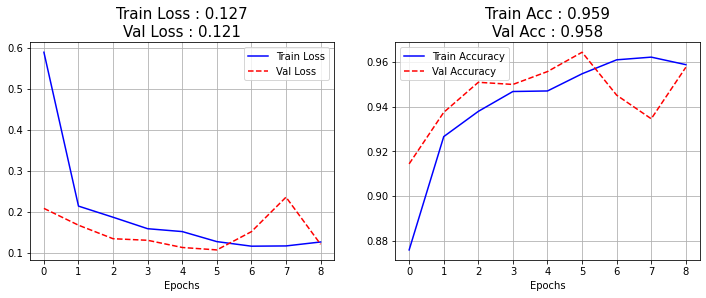

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')
#붉은색은 검증된 손실값?
plt.xlabel('Epochs')
plt.title("Train Loss : {:.3f}\nVal Loss : {:.3f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)


plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.title("Train Acc : {:.3f}\nVal Acc : {:.3f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.show()


In [33]:
model_swish_sigmoid.evaluate(test_X, test_Y_to_categorical)

41/41 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9785


[0.07813827693462372, 0.9784615635871887]

In [34]:
pred_Y = model_swish_sigmoid.predict(test_X)
print(np.round(pred_Y[:20], 2))

#[첫번째 유닛의 값,두번째 유닛의 값]
#이진분류는 0과1인데, 이걸로 어떻게 학습을 시킬까??
#경사하강법으로 하는 학습도 있지만, 손실함수를 구하려고하니..
#실제값이 1이고 예측값이 0, 실제값이 0이고 예측값이 1 일때..불가
#확률분포자체를 학습시킨다?!

[[0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.95 0.04]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.98 0.02]]


In [35]:
pred_Y = model_swish_sigmoid_no_onehot.predict(test_X)
print(np.round(pred_Y[:20], 2))

[[0.99]
 [0.93]
 [1.  ]
 [0.  ]
 [0.95]
 [0.91]
 [0.  ]
 [1.  ]
 [0.98]
 [0.99]
 [0.96]
 [0.98]
 [0.96]
 [0.09]
 [1.  ]
 [0.92]
 [1.  ]
 [0.98]
 [1.  ]
 [0.03]]


In [36]:
pred_Y = np.round(pred_Y)
print(pred_Y[:20])

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [37]:
print(test_Y_to_categorical[:20])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [38]:
model_swish_sigmoid.save('model_swish_sigmoid.h5')

In [39]:
print(wine['quality'].describe())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


In [40]:
print(wine['quality'].value_counts())


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


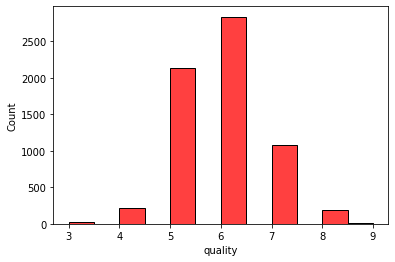

In [42]:
sns.histplot(wine['quality'], color = 'red', binwidth=0.5)

In [43]:
#비슷한 수치의 quality를 묶어서 범주화 한다.
#new_quality bad(3~5),normal(6),good(7~9)

In [44]:
wine.loc[wine['quality'] <= 5,'new_quality'] = 0
wine.loc[wine['quality'] == 6,'new_quality'] = 1
wine.loc[wine['quality'] >= 7,'new_quality'] = 2

In [45]:
print(wine['new_quality'].value_counts())

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


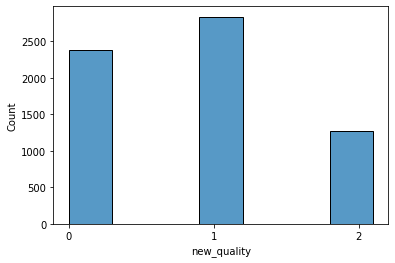

In [46]:
sns.histplot(wine['new_quality'], binwidth=0.3)
plt.xticks(ticks=[0,2,1])
plt.show()


In [47]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,2.0


In [48]:
#quality 변수지우기!!

del wine['quality']
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,2.0


In [49]:
#minmax 정규화

In [50]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
display(wine_norm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,new_quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.0,0.5
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,1.0,0.5
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,1.0,0.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,1.0,0.5
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,1.0,1.0


In [51]:
display(wine_norm['new_quality'][:10])

0    0.0
1    0.0
2    0.0
3    0.5
4    0.0
5    0.0
6    0.0
7    1.0
8    1.0
9    0.0
Name: new_quality, dtype: float64

In [52]:
display(wine['new_quality'][:10])

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
7    2.0
8    2.0
9    0.0
Name: new_quality, dtype: float64

In [53]:
#데이터 섞기

In [54]:
wine_shufle = wine_norm.sample(frac = 1)
wine_np = wine_shuffle.to_numpy()

In [55]:
train_ratio = 0.8

train_idx = int(len(wine_np)* train_ratio)
print("train_idx : ", train_idx)

train_idx :  5197


In [56]:
train_X, train_Y = wine_np[  : train_idx  ,   : -1  ], wine_np[ :train_idx,  -1 : ]
test_X, test_Y   = wine_np[  train_idx :   ,  : -1  ], wine_np[train_idx : , -1 : ]

In [57]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197, 1)
(1300, 12)
(1300, 1)


In [58]:
train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes = 3)
test_Y_to_categorical  = tf.keras.utils.to_categorical(test_Y, num_classes  = 3)

print(train_X.shape)
print(train_Y_to_categorical.shape)
print(test_X.shape)
print(test_Y_to_categorical.shape)

(5197, 12)
(5197, 3)
(1300, 12)
(1300, 3)


In [59]:
model_swish_softmax = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape = (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [60]:
model_swish_softmax.compile(optimizer=tf.keras.optimizers.Adam(),
                            loss = 'categorical_crossentropy',
                            metrics = ['accuracy'])

In [62]:
history = model_swish_softmax.fit(train_X, train_Y_to_categorical,
                                  epochs = 200, 
                                  batch_size = 32,
                                  validation_split = 0.2,
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience= 3 )])

Epoch 1/200
130/130 [==============================] - 1s 4ms/step - loss: 0.3095 - accuracy: 0.9071 - val_loss: 0.1871 - val_accuracy: 0.9394
Epoch 2/200
130/130 [==============================] - 0s 3ms/step - loss: 0.2050 - accuracy: 0.9314 - val_loss: 0.1608 - val_accuracy: 0.9462
Epoch 3/200
130/130 [==============================] - 0s 3ms/step - loss: 0.1821 - accuracy: 0.9353 - val_loss: 0.1564 - val_accuracy: 0.9442
Epoch 4/200
130/130 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9408 - val_loss: 0.1451 - val_accuracy: 0.9481
Epoch 5/200
130/130 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9423 - val_loss: 0.1324 - val_accuracy: 0.9500
Epoch 6/200
130/130 [==============================] - 0s 3ms/step - loss: 0.1463 - accuracy: 0.9473 - val_loss: 0.1400 - val_accuracy: 0.9481
Epoch 7/200
130/130 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9516 - val_loss: 0.1126 - val_accuracy: 0.9558

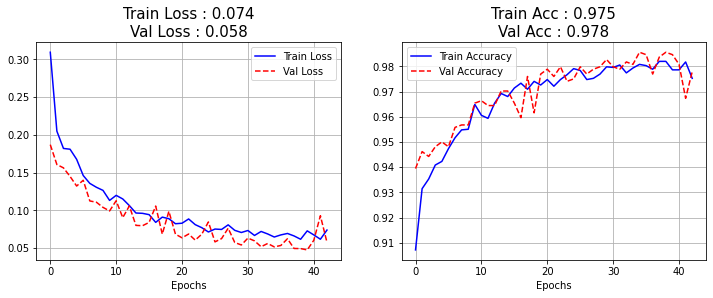

In [63]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')
plt.xlabel('Epochs')
plt.title("Train Loss : {:.3f}\nVal Loss : {:.3f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.title("Train Acc : {:.3f}\nVal Acc : {:.3f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.grid()
plt.legend()

plt.show()


In [64]:
model_swish_softmax.evaluate(test_X, test_Y_to_categorical)

41/41 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9754


[0.07250640541315079, 0.9753845930099487]

In [65]:
pred_Y = model_swish_softmax.predict(test_X)
print("pred_Y : \n", pred_Y)

pred_Y_round_2 = np.round(pred_Y, 2)
print("pred_Y_round_2 :\n", pred_Y_round_2)

pred_Y : 
 [[8.5245102e-04 9.9914718e-01 3.1673235e-07]
 [1.6131757e-03 9.9838686e-01 3.8043034e-08]
 [2.7691352e-04 9.9972302e-01 1.9695587e-09]
 ...
 [2.3597085e-04 9.9976403e-01 9.5598074e-10]
 [9.9984884e-01 1.5114914e-04 1.3942930e-15]
 [9.9994838e-01 5.1646006e-05 1.4925183e-15]]
pred_Y_round_2 :
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [66]:
print(test_Y_to_categorical[:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [67]:
pred_Y_argmax = np.argmax(pred_Y_round_2, axis = 1)
test_Y_argmax = np.argmax(test_Y_to_categorical, axis = 1)

print(pred_Y_argmax[:10])
print(test_Y_argmax[:10])

[1 1 1 0 1 1 0 1 1 1]
[1 1 1 0 1 1 0 1 1 1]


In [68]:
result = np.equal(pred_Y_argmax,test_Y_argmax)
acc = np.mean(result)
print("ACC : {:.3f}".format(acc * 100))

ACC : 97.538
